<a href="https://colab.research.google.com/github/blandersonw/MachineLearning/blob/main/HW4_2_BlakeAnderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will train Logistic Regression, which was the 2nd topic of Lecture 4.

Instead of the Iris dataset, we will use load the Digits dataset using "sklearn.datasets.load_digits()".
You'll use "X = digits["data"]" and "y = digits["target"]" to load images (=features) and their true labels.

Use the seed 0 everywhere.

1. Plot the first 100 images (with 10 images per row) as you did with MNIST. This dataset is  different from MNIST in sizes, number of examples, values, etc. You should modify the plotting function to accommodate the differences.

2. Randomly split the data into 80% training data and 20% testing data. Keep this split fixed.

We will try two different regularizers (l2 and l1) separately.

First use LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=C, random_state=0, max_iter=1000)

What does this do? Comment on the choice of arguments above.
Here C are the value you are going to provide as the regularization weight, similar to HW4-1.

3. For each value of Cs = [1E-5,1E-4,1E-3,1E-2,1E-1,1E0]

(a) instantiate LogisticRegression
(b) measure 4-fold cross_validation error

Report the cross-validation errors. Which C value has the smallest validation error?

4. Now use the hyperparameter to retrain the model from scratch using all training data. Report the train and test error of this final model.

5. Repeat 3 with LogisticRegression(..., penalty="l1", C=C, random_state=0, max_iter=1000, solver='saga')

6. Repeat 4 with LogisticRegression(..., penalty="l1", C=C, random_state=0, max_iter=1000, solver='saga')

 

# Importing Various Libraries

In [ ]:
import os
import tarfile
import urllib.request
import numpy as np
import sklearn
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plotting first 100 images

In [ ]:
#loading digit images
digits = load_digits()
X,y = digits['data'],digits['target']

In [ ]:
#function to plot images
def plot_images(instances, images_per_row=10, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

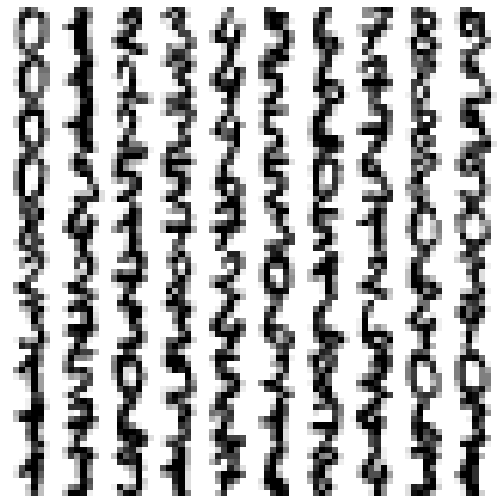

In [ ]:
#plotting 100 digit images, with 10 rows and 10 columns
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_images(example_images, images_per_row=10)
plt.show()

#Splitting datata into 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=0)

#Implementing logistic regression with various values C, for both l2 and l1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#function to run logistic regression model

def cval(logmodel):
  results = cross_val_score(logmodel, X_train, y_train, cv=4)
  meanval = (1-results.mean())
  print("Accuracy for C-value", (10**(-i)), "is", meanval)
  return(meanval)


lowesterrorl2 = 10**10
cvaluel2=0

print("Running model for L2")

#running the L2 model for each of the c values and calculating the c value with lowest cross-fold regression error
for i in range(0,6):
  logmodel = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=(10**(-i)), random_state=0, max_iter = 10000)
  currenterror = cval(logmodel)
  if currenterror < lowesterrorl2:
    lowesterrorl2 = currenterror
    cvaluel2 = (10**(-i))

print("Best cvalue is ", cvaluel2)

lowesterrorl1 = 10**10
cvaluel1=0

print("Running model for L1")

#running the L1 model for each of the c values and calculating the c value with lowest cross-fold regression error
for i in range(0,6):
  logmodel = LogisticRegression(multi_class="multinomial", penalty="l1", C=(10**(-i)), random_state=0, max_iter=10000, solver='saga')
  currenterror = cval(logmodel)
  if currenterror < lowesterrorl1:
    lowesterrorl1 = currenterror
    cvaluel1 = (10**(-i))

print("Best cvalue is ", cvaluel1)

Running model for L2
Accuracy for C-value 1 is 0.03549017332095328
Accuracy for C-value 0.1 is 0.03479572887650895
Accuracy for C-value 0.01 is 0.031309965954812724
Accuracy for C-value 0.001 is 0.04731894150417826
Accuracy for C-value 0.0001 is 0.07793252862890743
Accuracy for C-value 1e-05 is 0.15726748684617764
Best cvalue is  0.01
Running model for L1
Accuracy for C-value 1 is 0.04174984524914882
Accuracy for C-value 0.1 is 0.03687712782420294
Accuracy for C-value 0.01 is 0.07654750851129688
Accuracy for C-value 0.001 is 0.8044471525843393
Accuracy for C-value 0.0001 is 0.8949203033116682
Accuracy for C-value 1e-05 is 0.8949203033116682
Best cvalue is  0.1


In [ ]:
#creating errors function to calculate the mean squared error for training and testing data
def errors(logmodel):
  logmodel.fit(X_train, y_train)

  ypred_train = logmodel.predict(X_train)
  ypred_test = logmodel.predict(X_test)

  mse_train = mean_squared_error(y_train, ypred_train)
  mse_test = mean_squared_error(y_test, ypred_test)
  print("Training error is", mse_train, "and test error is", mse_test)

#running function for l2 model
print("Running model for L2 and cvalue", cvaluel2)
logmodel = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=cvaluel2, random_state=0, max_iter = 10000)
errors(logmodel)

#running function for l1 model
print("Running model for L1 and cvalue", cvaluel1)
logmodel = LogisticRegression(multi_class="multinomial", penalty="l1", C=cvaluel1, random_state=0, max_iter=10000, solver='saga')
errors(logmodel)

Running model for L2 and cvalue 0.01
Training error is 0.19554627696590118 and test error is 1.0361111111111112
Running model for L1 and cvalue 0.1
Training error is 0.2372999304105776 and test error is 1.0805555555555555
